In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-cognitive-performance-analysis/human_cognitive_performance.csv


# IMPORT DATA

In [2]:
data = pd.read_csv('/kaggle/input/human-cognitive-performance-analysis/human_cognitive_performance.csv')
data.head()

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


In [4]:
data.describe()

,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,38.525525,7.005333,5.493762,6.504646,248.988213,399.973579,69.498350,58.172395,58.121357
std,12.101876,1.734435,2.865308,3.167072,144.541990,115.369329,17.305659,23.058522,23.119598
min,18.000000,4.000000,1.000000,1.000000,0.000000,200.000000,40.000000,0.000000,0.000000
25%,28.000000,5.500000,3.000000,3.800000,123.000000,300.150000,55.000000,40.910000,40.850000
50%,39.000000,7.000000,5.000000,6.500000,249.000000,400.360000,70.000000,58.360000,58.360000
75%,49.000000,8.500000,8.000000,9.200000,375.000000,499.250000,85.000000,75.830000,75.890000
max,59.000000,10.000000,10.000000,12.000000,499.000000,599.990000,99.000000,100.000000,100.000000


In [5]:
data.duplicated().sum()
invalid_age = data[data['Age']<0]
invalid_age

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score


In [6]:
invalid_sleep_hours = data[data['Sleep_Duration']>24]
invalid_sleep_hours
random_data = data[data['Age']<40]

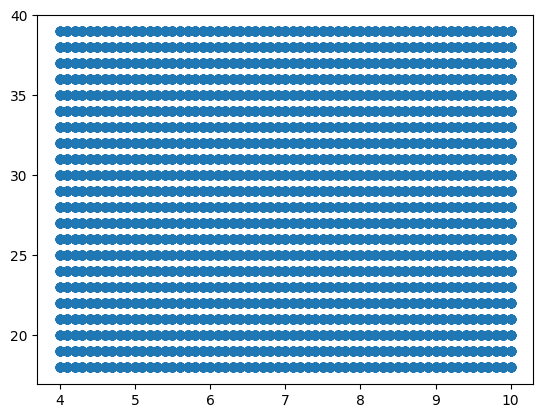

In [7]:
import matplotlib.pyplot as plt
plt.scatter(random_data['Sleep_Duration'],random_data['Age'])

In [8]:
for i in range(0, 60):
    average_sleep = data[data['Age'] == i]['Sleep_Duration'].mean()
    if not pd.isna(average_sleep):
        print(f"Average sleep at age {i} = {average_sleep}")


Average sleep at age 18 = 7.044564657393097
Average sleep at age 19 = 6.974857142857143
Average sleep at age 20 = 7.022510822510822
Average sleep at age 21 = 6.9599031216361675
Average sleep at age 22 = 7.136930330015716
Average sleep at age 23 = 7.028922908693276
Average sleep at age 24 = 6.941066666666667
Average sleep at age 25 = 6.971751709626512
Average sleep at age 26 = 7.09837574445046
Average sleep at age 27 = 6.991797283176593
Average sleep at age 28 = 6.989834024896266
Average sleep at age 29 = 7.025803161652218
Average sleep at age 30 = 6.961806656101427
Average sleep at age 31 = 6.969755058572949
Average sleep at age 32 = 6.958685685175751
Average sleep at age 33 = 6.9904024767801864
Average sleep at age 34 = 6.983342009370119
Average sleep at age 35 = 7.071174934725848
Average sleep at age 36 = 7.007339449541284
Average sleep at age 37 = 6.976572890025576
Average sleep at age 38 = 6.99200852424081
Average sleep at age 39 = 6.968098480880041
Average sleep at age 40 = 7.0487

In [9]:
sleep_less4 = data[data['Sleep_Duration']<4]
sleep_less4

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score


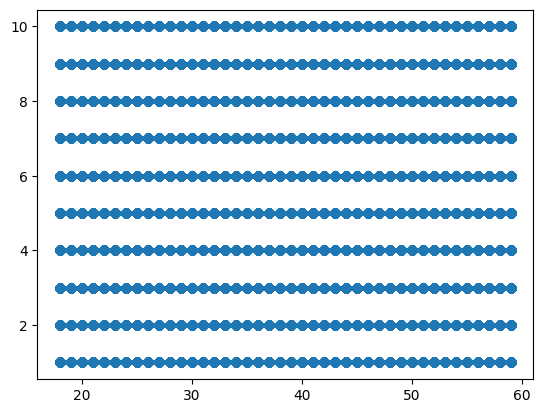

In [10]:
plt.scatter(data['Age'],data['Stress_Level'])

In [11]:
diet_veg= data[data['Diet_Type']=='Vegetarian']['Stress_Level'].mean()
print(diet_veg)
diet_nonveg= data[data['Diet_Type']=='Non-Vegetarian']['Stress_Level'].mean()
print(diet_nonveg)

5.512263838249917
5.485954236652357


In [12]:
female_stress = data[data['Gender']=='Female']['Stress_Level'].max()
print(female_stress)
male_stress = data[data['Gender']=='Male']['Stress_Level'].max()
print(male_stress)

10
10


In [13]:
female_reaction= data[data['Gender']=='Female']['Reaction_Time'].mean()
print(female_reaction)
male_reaction = data[data['Gender']=='Male']['Reaction_Time'].mean()
print(male_reaction)

399.91332855952504
399.9767684358854
